In [15]:
import numpy as np
import pandas as pd 
from matplotlib.pyplot import subplots
import statsmodels.api as sm  # import statsmodels this is the library we will use to fit the model
# statsmodels is a library for statistical modeling and testing
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from matplotlib.pyplot import subplots
# variance_inflation_factor is a function that calculates the variance inflation factor
# which is used to detect multicollinearity
from statsmodels.stats.anova import anova_lm # anova_lm is a function that performs analysis of variance

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)


In [16]:
# Load the data
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly) # import the ModelSpec class and the summarize function
# ModelSpec is a class that is used to create model specifications
# summarize is a function that is used to summarize the results of a fitted model

In [17]:
# function dir() is used to list all the attributes of an object
dir(MS) # list all the attributes of the ModelSpec class
# Ms is a class from the ISLP module that is used to create model specifications

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_validate_data',
 '_validate_params',
 'build_sequence',
 'build_submodel',
 'fit',
 'fit_transform',
 'get_metadata_routing',
 'get_params',
 'names',
 'set_output',
 'set_params',
 'transform']

In [18]:
A = np.array([3, 5, 11]) # create a numpy array
A.shape # get the shape of the array
A.ndim # get the number of dimensions of the array
A.size # get the number of elements in the array
A[:2] # get the first two elements of the array

dir(A) # list all the attributes of the array
A.mean() # calculate the mean of the array
A.__add__(6) # add 6 to each element of the array
A + 6 # add 6 to each element of the array
A.__add__(np.array([1, 2, 3])) # add two arrays
A.sum() # calculate the sum of the array

19

### Simple linear Regression 

- Construct model matrices aka **design matrices** 
- We use ModelSpec() transform from ISPL.models 
- Use Boston housing dataset 
- mdev(median house value) for 506 neigborhoods around Boston 
- We build a regression model to predict **mdev** using 13 predictors such as **rmvar**, **age** and **lstat** 
- Use **statsmodels** a py package that implements several common used reg methods 

In [19]:
Boston = load_data('Boston') # read the Boston dataset
Boston.info() # check the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [20]:
Boston.head() # check the data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [21]:
Boston.columns # get the columns of the dataframe

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [22]:
#X_t, y_t = Boston['lstat'], Boston['medv'] # create the features and the response variable
#beta_1 , beta_0 = np.polyfit(X_t, y_t ,deg=1) # fit a simple linear regression model
#beta_1, beta_0 # get the coefficients of the model

In [23]:
# use sm.OLS to fit a simple linear regression model
# medv as the response and lstat as the single predictor
X = pd.DataFrame({'intercept' : np.ones(Boston.shape[0]), 'lstat' : Boston['lstat']}) # create the design matrix
X.head() # check the data
X[:5] # check the data

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


In [24]:
y = Boston['medv'] # create the response variable
y[:5] # check the data

model = sm.OLS(y, X) # create the model
result = model.fit() # fit the model
result.summary() # print the summary of the model

# sm is the alias for statsmodels.api
# OLS is the class for ordinary least squares regression

summarize(result) # summarize the results of the model
# summarize is a function that is used to summarize the results of a fitted model
# it prints the coefficients, standard errors, t-statistics, p-values, and R-squared of the model
# summarize is the function in the ISLP package
# summary is a method of the result object in the statsmodels.api package

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


### Using Transformations: Fit and transform

- Model before had one predictor and constructing X was easy. In practice we fit models with more than one predictor typically selected from an array or data frame. We may wish to introduce transformations to the variables before fitting the model, **specify interactions between variables, and expand some particular variables into sets of variables**
- **Sklearn** <> transform() and fit()

- We first describe the process for our simple reg model using a single predictor **lstat** but it will use it in more and more complex task
- Transform is made by **MS()**
- **fit()** method takes the original array and may do some initial computation on it as specifid in the transform object. For ex mean and std for centering and scaling.
- transform() applies the fitted transformation to the array of data and produces the model matrix 

In [25]:
design = MS(['lstat']) # create the model specification
design # print the model specification
X = design.fit_transform(Boston) # create the design matrix
X[:5] # check the data


,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


- fit() does very little, it just checks that var 'lstat' specified in design exists in Boston.
- **transform()** constructs the model matrix with 2 col's an __intercept__ and __variable lstat__
- The operations can be combined with __fit_transform()__


- object **results** has several methods that can be used for inference
- for a full summary  of the fit we use __summary()__ method 

In [26]:
result.summary() # print the summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 23 Mar 2024   Prob (F-statistic):           5.08e-88
Time:                        16:44:25   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
result.params # get the coefficients of the model

intercept    34.553841
lstat        -0.950049
dtype: float64

- __get_prediction()__ method can be used to optain predictions and produce C:I and P:I  for the prediction of __mdev__ for given values of __lstat__
- We create a new dataframe only whit 'lstat' whit values for this var at which we wish to make predictions
- Use transform() method of design to create the coresponding model matrix.

In [28]:
new_df = pd.DataFrame({'lstat' : [5, 10, 15]}) # create a new dataframe with new observations
new_df # check the data

,lstat
0,5
1,10
2,15


In [29]:
newX = design.transform(new_df) # create the design matrix for the new observations
newX # check the data

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


- Compute the predictions at __newX__ and view and wiew them by extracting the predicted_mean

In [30]:
new_pred = result.get_prediction(newX) # get the predictions for the new observations
new_pred.summary_frame() # print the summary of the predictions

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


In [31]:
new_pred.predicted_mean # get the predicted values

array([29.80359411, 25.05334734, 20.30310057])

In [32]:
new_pred.conf_int(alpha=0.05) # get the confidence intervals for the predictions

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [33]:
new_pred.conf_int(alpha=0.05, obs=True) # get the prediction intervals for the predictions

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

- Defining functions to add a line to the existing plot 
- def funcname()
- ax = axis object for an existing object 
- b = intercept 
- m = slope of desired line
- other ploting options can be passed into ax.plot by including opt parameters

In [34]:
def abline(ax, b, m):
    '''Add a line with slope m and intercept b to ax'''
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim)

In [35]:
def abline(ax, b, m, *args, **kvargs):
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kvargs)

# *args allows a nr of non-named arguments to abline
# **kvargs allows a nr of named arguments such as linewidth=3

- Use the func to add this regression line to a plot of __mdev__ vs __lstat__
- there is a function to add a line to a plot __ax.axline()__

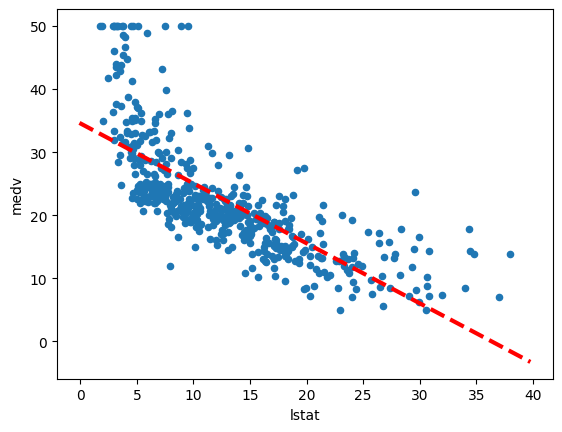

In [36]:
ax = Boston.plot.scatter('lstat', 'medv')

abline(ax, 
       result.params[0], 
       result.params[1],
       'r--', 
       linewidth=3)

- We examine some diagnostic plots
- We can find the __fitted values__ and __residuals of the fit__ as atributes of the result object
- Various influence messures describing the reg model are computed with the __get_influence()__ method

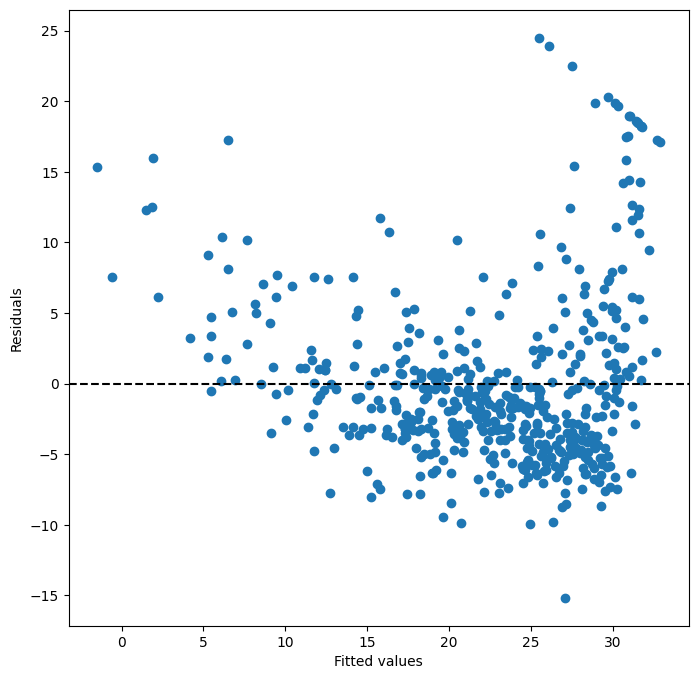

In [37]:
ax = subplots(figsize=(8,8))[1] # create a graph 
ax.scatter(result.fittedvalues, result.resid)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.axhline(0, c='k', ls='--')


- We added a horizontal line at 0 for reference using __ax.hline() method__ 
- c='k' indicate the line should be black
- line should be dashed __ls='--'__

- Leverage statistic can be computed for any nr of predictors using hat_matrix_diag attribute of the value returned by __get_influence()__ method 

374

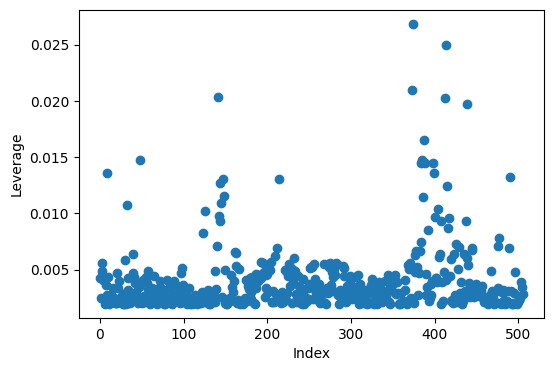

In [38]:
infl = result.get_influence()
ax = subplots(figsize=(6,4))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

# np.argmax() func identifies the index of the largest element of an array, optionally computed 
# over axis of the array. In this case we maximized over the entire array to determine wich obs has the la
# the largest leverage statistic 

### Multiple Linear Regression 

- Use the __ModelSpec()__ transform to construct the required model matrix
  and response

In [39]:
X = MS(['lstat', 'age']).fit_transform(Boston) # compact into a succint expression describing the construct of X
X

,intercept,lstat,age
0,1.0,4.98,65.2
1,1.0,9.14,78.9
2,1.0,4.03,61.1
3,1.0,2.94,45.8
4,1.0,5.33,54.2
...,...,...,...
501,1.0,9.67,69.1
502,1.0,9.08,76.7
503,1.0,5.64,91.0
504,1.0,6.48,89.3


In [40]:
model1 = sm.OLS(y, X) # 
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [41]:
# Boston data set has 12 variables, we dont need to type all of them 
terms = Boston.columns.drop('medv')
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

- Fit the model with all variables in __terms__ using same matrix builder

In [42]:
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


- Run a reg whitout a variable dvs excluding one variable for ex 'age'

In [43]:
minus_age = Boston.columns.drop('medv', 'age')
Xma = MS(minus_age).fit_transform(Boston)
model1 = sm.OLS(y, Xma)
summarize(model1.fit())

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


- Multivariante Goodness of fit 
- We can access individual components of **results** by name **dir(results)** it will show us what is awailible
- Hence __resultls.rsquared__ gives us **R^2** 
- __np.sqrt(results.scale)__ gives us **RSE**
- __Variance inflation factors__ are sometimes usefull to asses the effect of **coliniarity** 
- __VIF__ 

### List Comprehension

- Often we encounter a sequance of objects which we would like to transform for some other task
- Bellow we compute VIF  for each feature in our **X** matrix and produce a data frame whose index agrees with the col's of X.
- **List Comprehension** are simple and powerfull ways to form list of py obj's.
- Py suports __dictionary__ and __generator comprehension__ 

In [44]:
vals = [vif(X, i)
        for i in range(1, X.shape[1])]
VIF = pd.DataFrame({'vif' : vals},
                   index=X.columns[1:])

VIF



,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


- VIF() func takes two arguments: a dataframe or array, and a variabel column index
- In the code above we call vif() whit for loop for all the col's in X
- We excludet col 0 (intercept) cuz is of no interest

###  Interaction terms 
- It is easy to include interaction terms in a ln model using __ModelSpec()__
- Including a tuple ('lstat', 'age') tells the model matrix builder to include an interaction term between  them

In [45]:
X = MS(['lstat',
        'age',
        ('lstat', 'age')]).fit_transform(Boston)
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


### Non-linerar Transformation of the predictors 

- The model matrix builder can include terms beyond just columns names and interactions 
- For instance the __poly()__ func in __ISLP__ specifies the columns representing polynomial functions of its first are added to model matrix.
  

In [46]:
X = MS([poly('lstat', degree=2), 'age']).fit_transform(Boston)
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


- The poly() creates a basis matrix for inclusion in the model matrix whose col's are __orth-polynomials__ which are designed for stable least square computations.
- Inclusion of __raw=True__ in poly() the basis matrix would consist simply of lstat and lstat**2
- We use __anova_lm() function__ to further quantify the extent to which the quadratic fit is superior to the linear fix.

In [47]:
anova_lm(results1, results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


- results1 repr the linear submodel containing predictors lstat and age
- results3 repr the larger model above whit the quadratic term in lstat
- the anoval_lm() func preform hypothisis test comparing the models 
- The null hyto is that the quadratic term in the bigger model is not needed 
- Alternative hypothesis is that the bigger model is superior 
- F-stat is 177.28 and p-value is 0
- F-stat is the square of the t-statistic for the quadratic term in the linear model summary for 
- the quadratic term in the linear model summary for the results3
- The anova_lm() can take more then 2 nested models input so it compares every succesive pair of models
- __The Nan__ in the first row sience there is no previous model to compare to

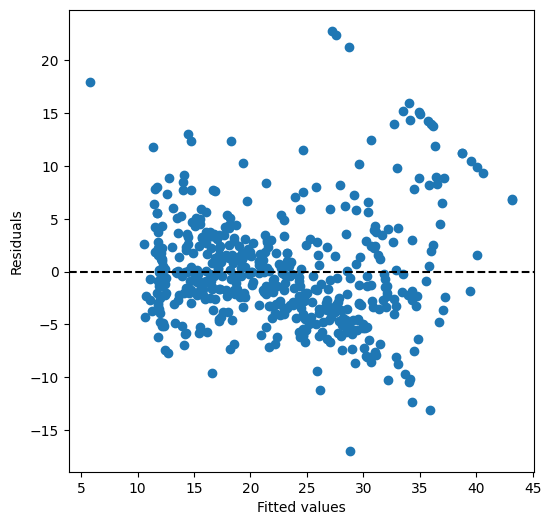

In [48]:
ax = subplots(figsize=(6,6))[1]
ax.scatter(results3.fittedvalues, results3.resid)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.axhline(0, c='k', ls='--')


- We see that when the quadratic term is included in the model, there is little discernible pattern in the residuals. In order to create a cubic or higher-degree polynomial fit, we can simply change the degree argument to poly()

### Qualitative Predictors 

- Dataset includes qualitative predictors such as ShelveLoc 
- ShelveLoc has three possible values: Bad, Medium, Good
- ModelSpec() generates a dummy variables automaticly 
- These dummi var are often called __one hot encoding__ of the categorical feature.
- Their col's sum to one, so to avoid collinearity with an intercept, the first col is dropped. 

In [49]:
Carseats = load_data('Carseats')
allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']
final = allvars + [('Income', 'Advertising') , ('Price', 'Age')]

X = MS(final).fit_transform(Carseats)
model = sm.OLS(y, X)
summarize(model.fit())


,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288


- Made allvars a list so we can add interaction term two lines down
- Model has created a ShelveLoc[Good] dummy variable that takes on a value of 1 if the shelvig loc is good, otherwise takes 0
- Same for ShelveLoc[Medium]
- A bad location coresponds to zero for each of the two dummy variables 

In [50]:
dir(MS)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_validate_data',
 '_validate_params',
 'build_sequence',
 'build_submodel',
 'fit',
 'fit_transform',
 'get_metadata_routing',
 'get_params',
 'names',
 'set_output',
 'set_params',
 'transform']

In [51]:
import seaborn as sns
Advertising = pd.read_csv('../data/Advertising.csv', index_col=0)
Advertising.columns


Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

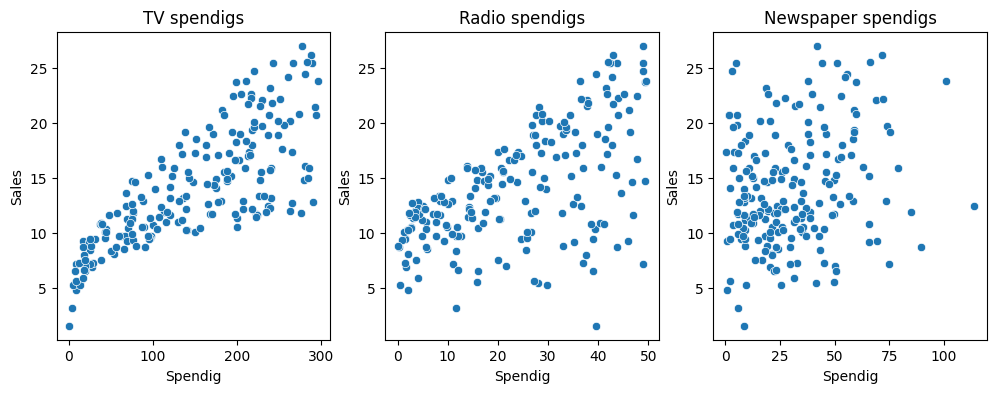

In [52]:
nr_features = Advertising.shape[1] - 1
features = Advertising.columns[:nr_features]

fig, axes = subplots(1, nr_features, figsize=(12, 4))
for i, feature in enumerate(features):
    sns.scatterplot(data=Advertising, x=feature, y='Sales', ax=axes[i])
    axes[i].set(xlabel='Spendig', title= f'{feature} spendigs')

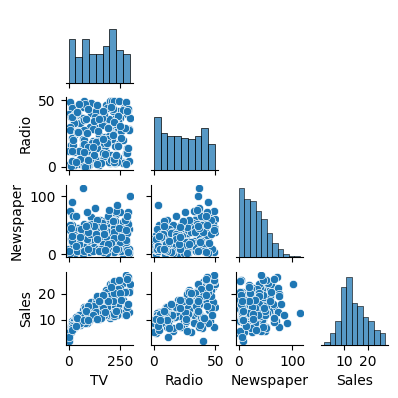

In [53]:
ax = sns.pairplot(Advertising, corner=True, height=1)

In [54]:
X, y = Advertising['TV'], Advertising['Sales']
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
summarize(results)
results.params
print(f'Intercept = {results.params[0]:.2f}, Slope = {results.params[1]:.2f}')

Intercept = 7.03, Slope = 0.05


Text(0.5, 1.0, 'TV advertising and sales')

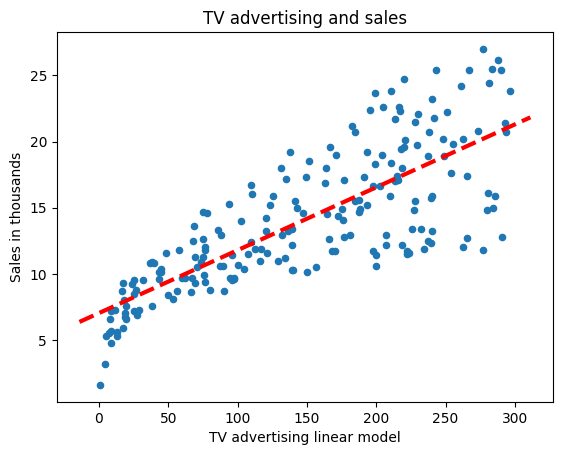

In [55]:
# plot the data and the fitted line
ax = Advertising.plot.scatter('TV', 'Sales')
abline(ax, results.params[0], results.params[1], 'r--', linewidth=3)
ax.set_xlabel('TV advertising linear model')
ax.set_ylabel('Sales in thousands')
ax.set_title('TV advertising and sales')


<Axes: xlabel='TV', ylabel='Sales'>

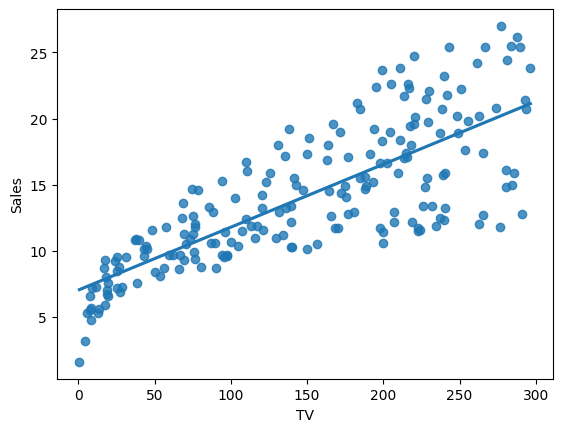

In [56]:
# regression line using seaborn
sns.regplot(data=Advertising, x='TV', y='Sales', ci=None)

In [57]:
# Multiple linear regression


X, y = Advertising.drop('Sales', axis='columns'), Advertising['Sales']
X.insert(0, 'Intercept', 1) # add a column of ones to the design matrix
model = sm.OLS(y, X) # create the model
results = model.fit() # fit the model
summarize(results) # summarize the results

,coef,std err,t,P>|t|
Intercept,2.9389,0.312,9.422,0.00
TV,0.0458,0.001,32.809,0.00
Radio,0.1885,0.009,21.893,0.00
Newspaper,-0.0010,0.006,-0.177,0.86


In [58]:
# predict the sales for a new observations
new_obs = pd.DataFrame({'Intercept' : [1], 'TV' : [200], 'Radio' : [10], 'Newspaper' : [4]})
results.predict(new_obs)

0    13.972969
dtype: float64

In [59]:
test_sample = [1, 230.1, 37.8, 69.2]
results.predict(test_sample)

array([20.52397441])

In [60]:
# Split the data into a training set and a test set to evaluate the model
# we will use 80% of the data for training and 20% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# fit the model using the training set
model = sm.OLS(y_train, X_train)
results = model.fit()
summarize(results)

# check the shapes of the training and test sets

for dataset in [X_train, X_test, y_train, y_test]:
    print(f'Shape of the dataset: {dataset.shape}')

Shape of the dataset: (140, 4)
Shape of the dataset: (60, 4)
Shape of the dataset: (140,)
Shape of the dataset: (60,)


In [61]:
# train the model using the training set
model = sm.OLS(y_train, X_train).fit().params
model
print(f'Intercept = {model[0]:.2f}, TV = {model[1]:.2f}, Radio = {model[2]:.2f}, Newspaper = {model[3]:.2f}')

predict = lambda X, weights: X @ weights
y_pred = predict(X_test.to_numpy(), np.reshape(model.to_numpy(), (4, 1)))
y_pred.shape
print(f'{X_test.iloc[0].values[1:]}')
print(f'Predicted sales: {y_pred[0][0]:.2f}, Actual sales: {y_test.iloc[0]:.2f}')


Intercept = 2.71, TV = 0.04, Radio = 0.20, Newspaper = 0.01
[163.3  31.6  52.9]
Predicted sales: 16.57, Actual sales: 16.90


In [62]:
# Get metrics for the model

y_pred = np.reshape(y_pred, (60,))
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
Rmse = np.sqrt(mse)
print(f'Mean squared error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')
print(f'Root mean squared error: {Rmse:.2f}')

Mean squared error: 3.80
R-squared: 0.86
Root mean squared error: 1.95


Text(0.5, 1.0, 'Cost for phone subscription')

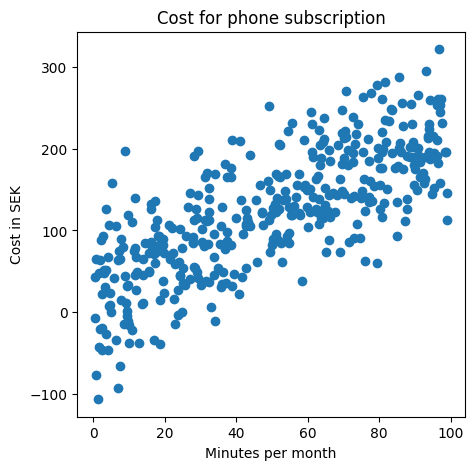

In [63]:
# simulate data (x, y)  to represent cost for phone subscription whit x minutes per month and y cost in SEK
seed = np.random.seed(42) # set the seed for reproducibility
x = np.random.uniform(0, 100, 400) # generate 400 random numbers between 0 and 100
# Take absolute value of the random numbers
x = np.abs(x)

# Generate noise values
noise = np.random.normal(0, 50, 400) # generate 400 random numbers from a normal distribution with mean 0 and standard deviation 10

# We let y = 2x + 25 + noise
y = 2 * x + 25 + noise # generate the response variable

# Plot the data
fig, ax = subplots(figsize=(5, 5))
ax.scatter(x, y)
ax.set_xlabel('Minutes per month')
ax.set_ylabel('Cost in SEK')
ax.set_title('Cost for phone subscription')



In [64]:
# remove outliers from the data that are more then 300 minutes per month
mask = x < 300
x = x[mask]
y = y[mask] 

# No cost can be negative
mask2 = y > 0
x = x[mask2]
y = y[mask2]



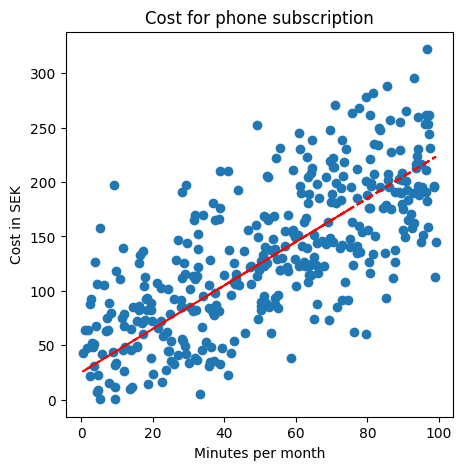

In [65]:
fig, ax = subplots(figsize=(5, 5))
ax.scatter(x, y)
ax.set_xlabel('Minutes per month')
ax.set_ylabel('Cost in SEK')
ax.set_title('Cost for phone subscription')

# plot ground truth
ax.plot(x, 2 * x + 25, 'r--', label='Ground truth')


In [66]:
# Create a dataframe with the data
data = pd.DataFrame({'minutes' : x, 'cost' : y})
data.head()

# Check len of a column
len(data['cost'])


375

In [67]:
#import train test split
from sklearn.model_selection import train_test_split

# split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(data['minutes'], data['cost'], test_size=.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((262,), (113,), (262,), (113,))

In [68]:
# fit a simple linear regression model
beta_1, beta_0 = np.polyfit(X_train, y_train, deg=1)

print(f'Intercept = {beta_0:.2f}, Slope = {beta_1:.2f}')

# use normal equation to fit a simple linear regression model
X = np.c_[np.ones(X_train.shape[0]), X_train] # create the design matrix
beta = np.linalg.inv(X.T @ X) @ X.T @ y_train # calculate the coefficients
beta

Intercept = 47.31, Slope = 1.66


array([47.31238804,  1.65781987])

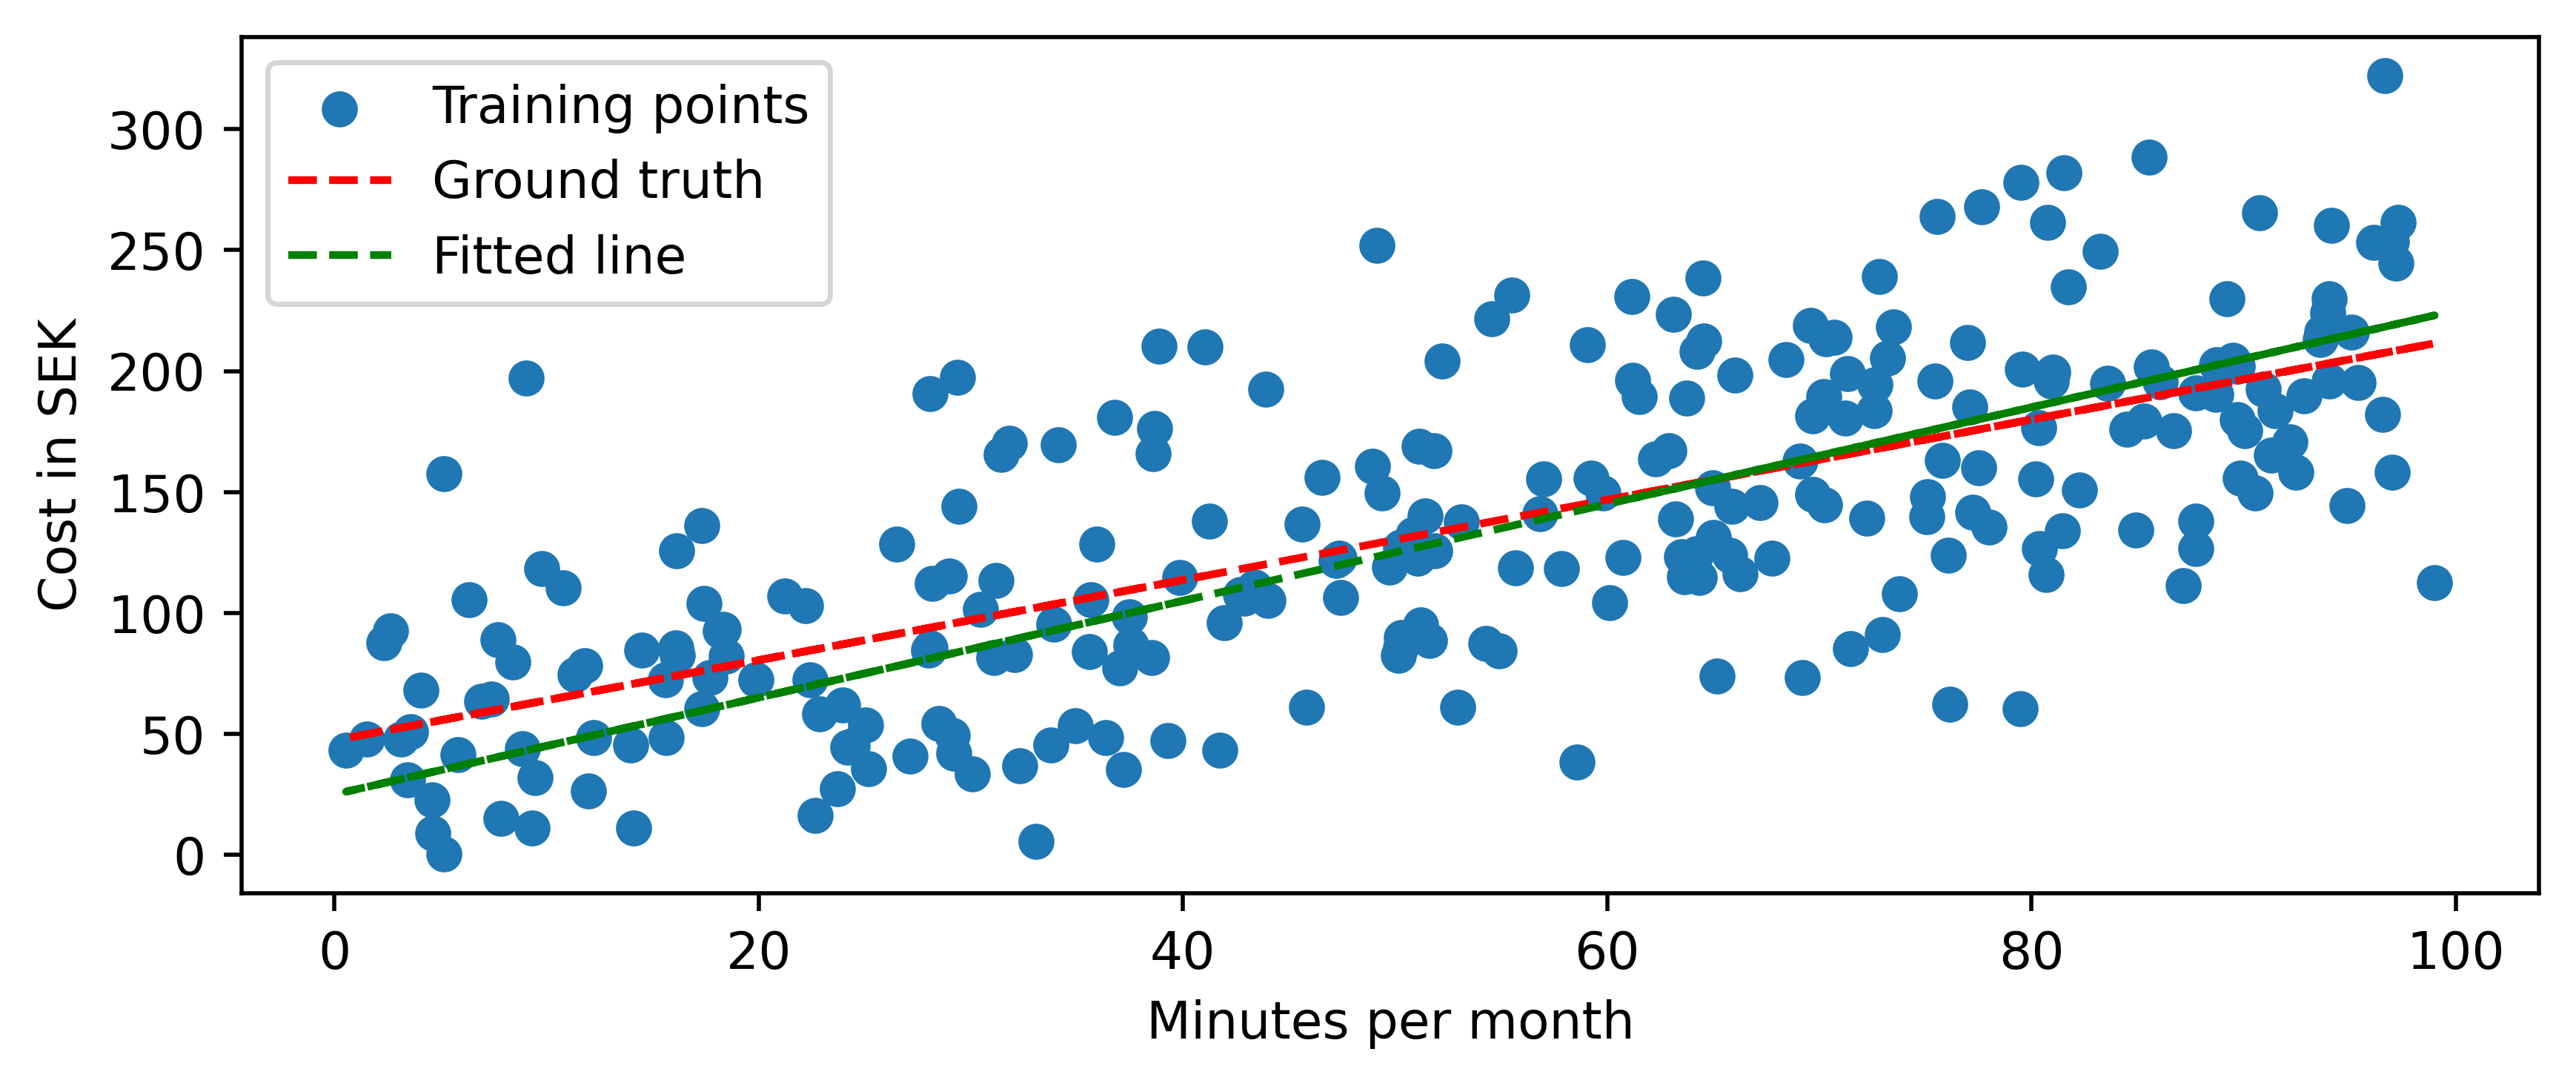

In [69]:
# plot Training data fitted line and ground truth
fig, ax = subplots(figsize=(8, 3), dpi=500)
ax.scatter(X_train, y_train)
ax.plot(X_train, beta_0 + beta_1 * X_train, 'r--', label='Fitted line')
ax.plot(X_train, 2 * X_train + 25, 'g--', label='Ground truth')
ax.set_xlabel('Minutes per month')
ax.set_ylabel('Cost in SEK')

# Set legend to the plot with names of the lines and points as trainig points

ax.legend(['Training points' ,'Ground truth', 'Fitted line' ])

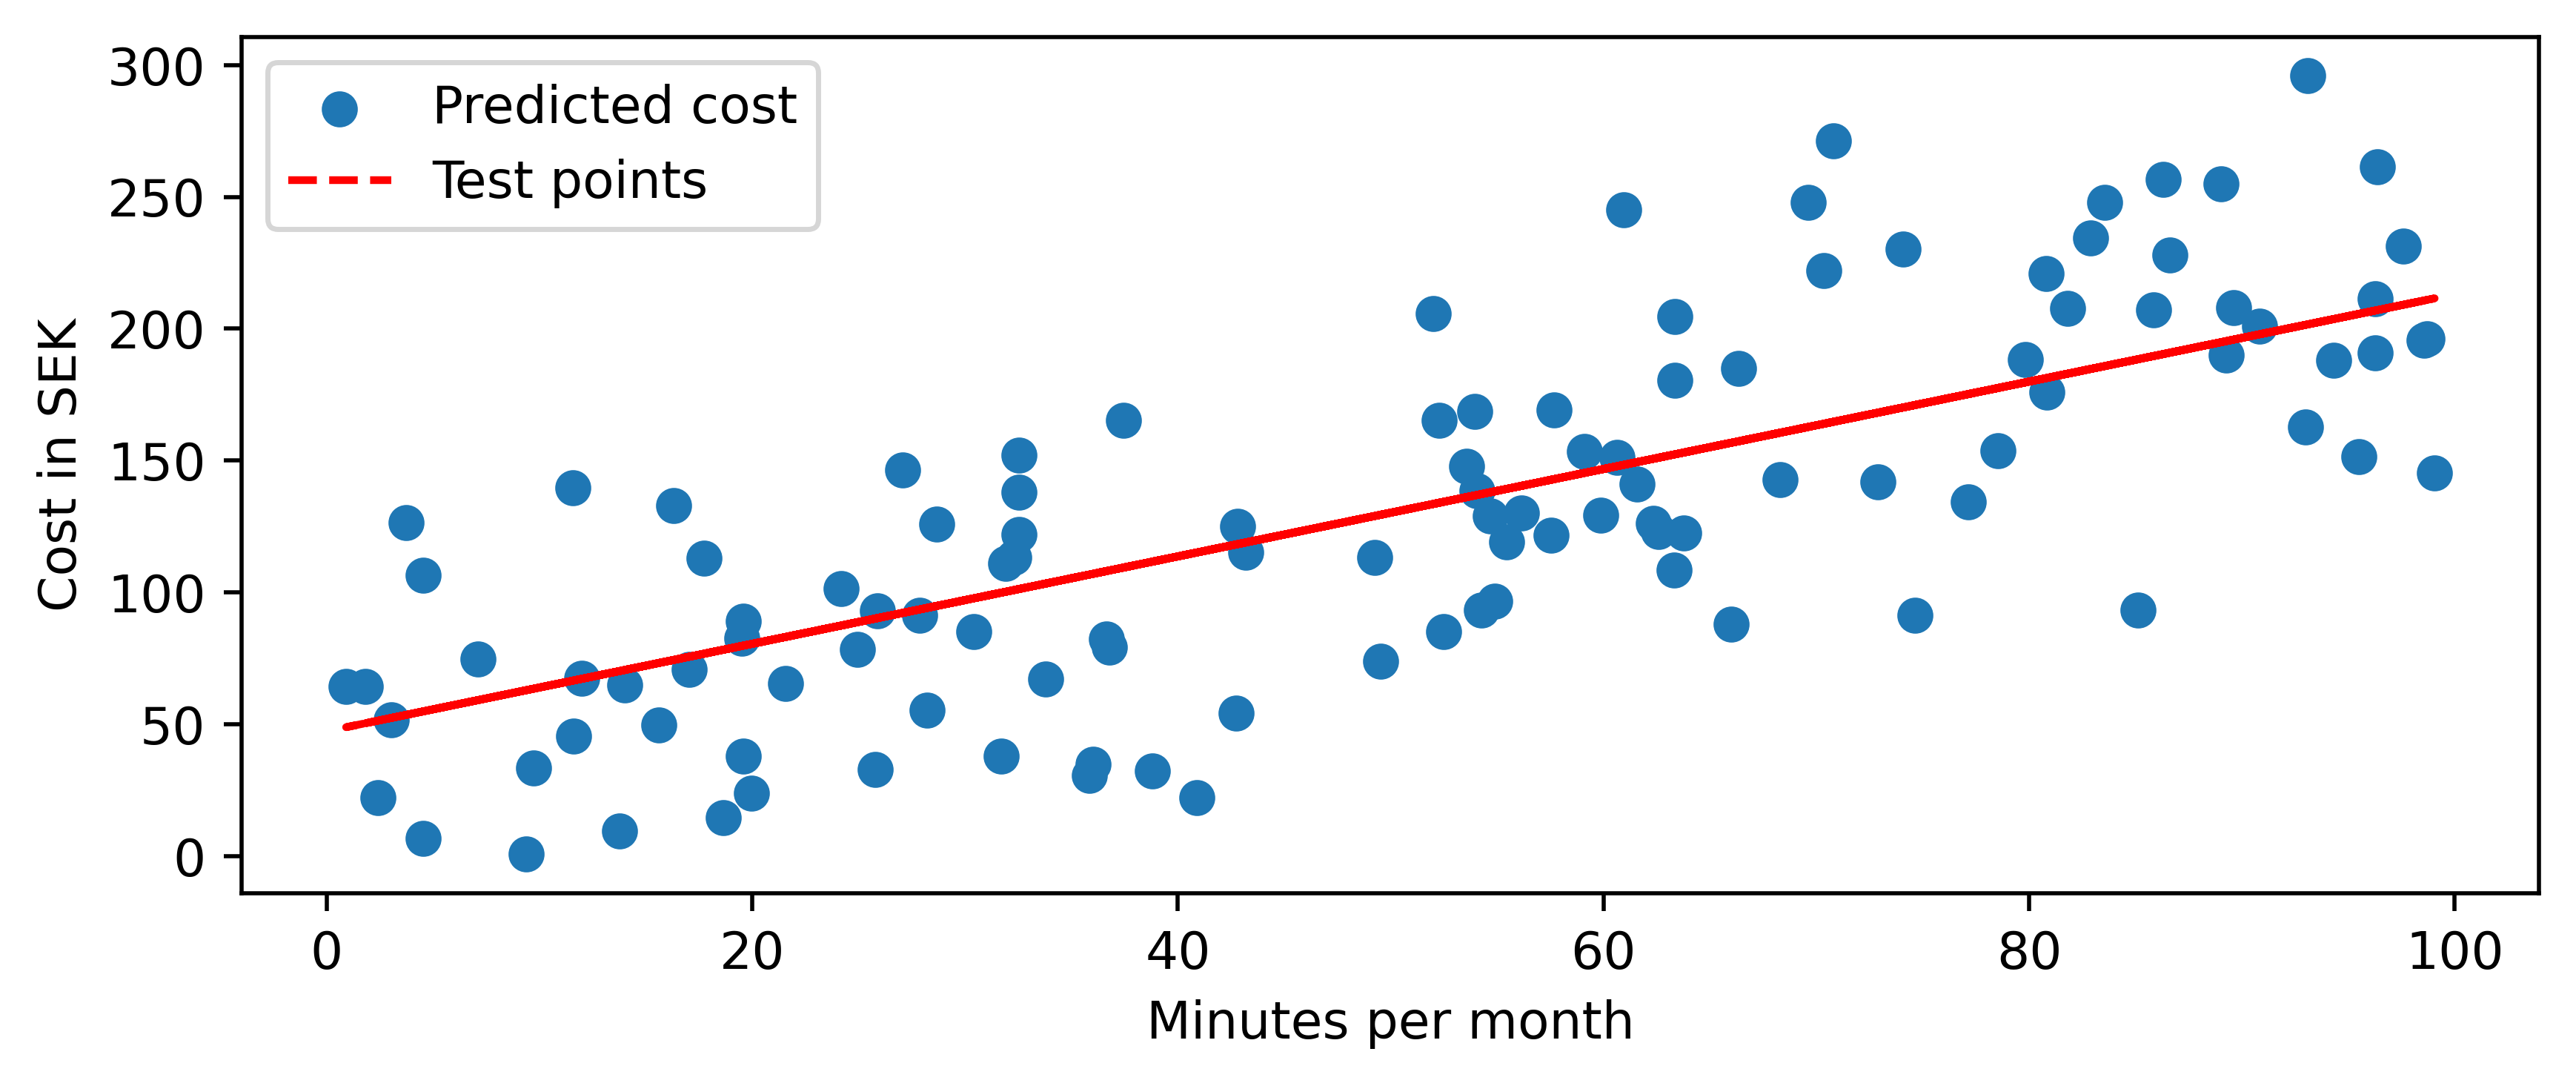

In [70]:
# make predictions on the test set using the fitted model
y_pred = beta_0 + beta_1 * X_test
y_pred[:5]
# plot the prediction cost against X_test and y_test against X_test
fig, ax = subplots(figsize=(8, 3), dpi=500)
ax.scatter(X_test, y_test)
ax.plot(X_test, y_pred, 'r--')
ax.set_xlabel('Minutes per month')
ax.set_ylabel('Cost in SEK')
ax.legend(['Predicted cost', 'Test points'])


In [71]:
# Get metrics for the model using the test set, MSE, MAE, RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean squared error: {mse:.2f}')
print(f'Mean absolute error: {mae:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean squared error: 1955.25
Mean absolute error: 35.70
Root mean squared error: 44.22


In [72]:
# Multiple linear regression
# model for the cost is y = 25 + 2x1 + 0.5x2 + 50x3 + noise
# where x1 is minutes, x2 cost per sms, x3 cost per gb
# we will use the same seed to generate the data
seed = np.random.seed(42)
x1 = np.random.normal(0, 150, 10000) # generate 10000 random numbers between 100 and 1000
x1 = np.abs(x1) # take the absolute value of the random numbers
x2 = np.random.uniform(0, 50, 10000) # generate 10000 random numbers between 0 and 50 discrete uniform distribution
x3 = np.random.normal(0, 2, 10000) # generate 10000 random numbers between 0 and 2 
x3 = np.abs(x3) # take the absolute value of the random numbers
noise = np.random.normal(0, 50) # generate 10000 random numbers from a normal distribution with mean 0 and standard deviation 50
y = 25 + 2 * x1 + 0.5 * x2 + 50 * x3 + noise # generate the response variable

# insert 

# create a dataframe with the data
data = pd.DataFrame({'minutes' : x1, 'sms' : x2, 'gb' : x3, 'cost' : y}, )

# insert an intercept column
data.insert(0, 'intercept', 1)
data.head()
len('noise')

5

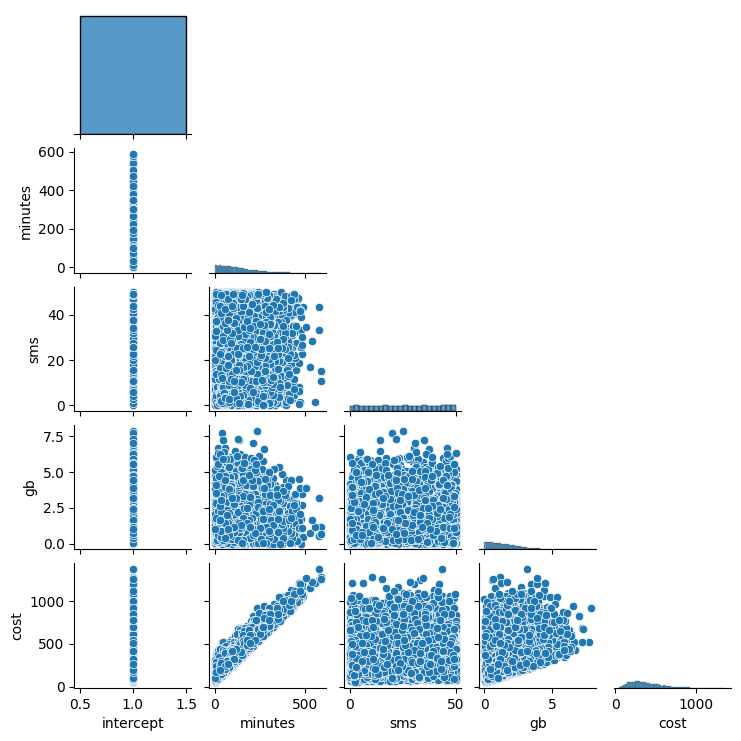

In [73]:
ax = sns.pairplot(data, corner=True, height=1.5)

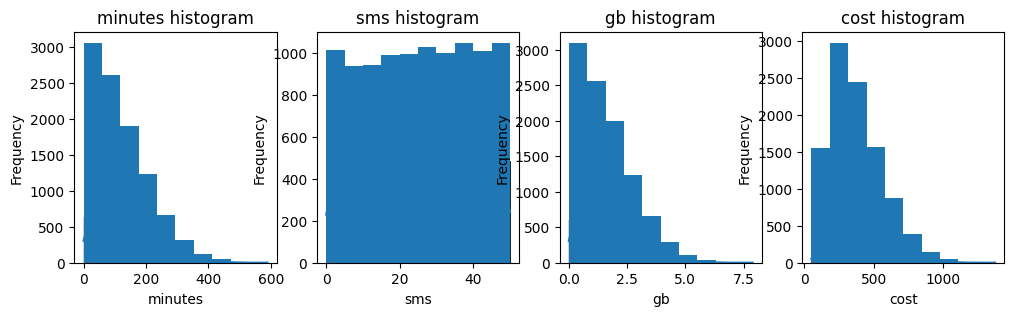

In [74]:
# Create histograms for the data remove the intercept column and y column

fig, axes = subplots(1, 4, figsize=(12, 3))
for i, col in enumerate(['minutes', 'sms', 'gb', 'cost']):
    sns.histplot(data[col], ax=axes[i], kde=True)
    axes[i].set_title(f'{col} histogram')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    bins = 10
    axes[i].hist(data[col], bins=bins)


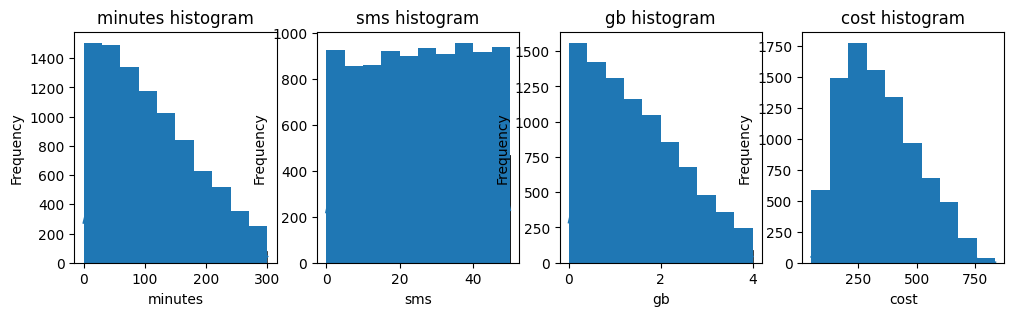

In [75]:
# Clean the data whith constraints
mask = (data['minutes'] < 300) & (data['gb'] < 4) & (data['cost'] > 0)
data = data[mask]

fig, axes = subplots(1, 4, figsize=(12, 3))
for i, col in enumerate(['minutes', 'sms', 'gb', 'cost']):
    sns.histplot(data[col], ax=axes[i], kde=True)
    axes[i].set_title(f'{col} histogram')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    bins = 10
    axes[i].hist(data[col], bins=bins)
    

    

In [76]:
# Split the data into a training set and a test set to evaluate the model
# we will use 80% of the data for training and 20% for testing
#multiple linear regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('cost', axis=1), data['cost'], test_size=0.2, random_state=42)

# fit the model using the training set
model = sm.OLS(y_train, X_train)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.9424,3.880000e-15,1.080000e+16,0.0
minutes,2.0000,1.800000e-17,1.110000e+17,0.0
sms,0.5000,9.320000e-17,5.360000e+15,0.0
gb,50.0000,1.350000e-15,3.720000e+16,0.0


In [77]:
# use normal equation to fit multiple linear regression model
X = np.c_[ X_train] # create the design matrix
beta = np.linalg.inv(X.T @ X) @ X.T @ y_train # calculate the coefficients
beta

array([41.94235482,  2.        ,  0.5       , 50.        ])

In [78]:
# modify the shape of the beta array to match the shape of the X_test array which is (2000, 4)
beta = np.reshape(beta, (4, 1))


# predict test set
predict = lambda X, weights: X @ weights
y_pred = predict(X_test.to_numpy(), beta)
# Get metrics for the model using the test set, MSE, MAE, RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean squared error: {mse:.2f}')
print(f'Mean absolute error: {mae:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
y_pred
#X_test.shape

Mean squared error: 0.00
Mean absolute error: 0.00
Root mean squared error: 0.00


array([[106.23302667],
       [191.6322971 ],
       [679.21726599],
       ...,
       [290.66791543],
       [197.01324407],
       [113.09045352]])

In [79]:
predict = lambda X, weights: X @ weights
y_pred = predict(X_test.to_numpy(), np.reshape(results.to_numpy(), (5, 4)))
y_pred.shape
print(f'{X_test.iloc[0].values[1:]}')
print(f'Predicted sales: {y_pred[0][0]:.2f}, Actual sales: {y_test.iloc[0]:.2f}')


AttributeError: 'OLSResults' object has no attribute 'to_numpy'

In [ ]:
predict = lambda X, weights: X @ weights
y_pred = predict(X_test.to_numpy(), np.reshape(model.to_numpy(), (4, 1)))
y_pred.shape
print(f'{X_test.iloc[0].values[1:]}')
print(f'Predicted sales: {y_pred[0][0]:.2f}, Actual sales: {y_test.iloc[0]:.2f}')